In [7]:
# import libraries
import folium
import pandas as pd

In [8]:
# Make a data frame with dots to show on the map
data = pd.DataFrame({
'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']
})
data


,lat,lon,name
0,-58.00,-34.00,Buenos Aires
1,2.00,49.00,Paris
2,145.00,-38.00,melbourne
3,30.32,59.93,St Petersbourg
4,-4.03,5.33,Abidjan
5,-73.57,45.52,Montreal
6,36.82,-1.29,Nairobi
7,-38.50,-12.97,Salvador


In [9]:
# Make an empty map
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)


In [10]:
# I can add marker one by one on the map
for i in range(0,len(data)):
folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']], popup=data.iloc[i]['name']).add_to(m)

IndentationError: expected an indented block (<ipython-input-10-1b8d2deff559>, line 3)

In [2]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
# Create a list of word
text=("DANIEL Python Python DANIEL Matplotlib Seaborn DANIEL Plot Violin DANIEL Pandas DANIEL Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")

In [15]:
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

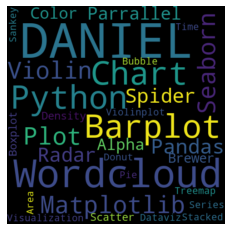

In [16]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()